# Quantitative evaluation results

In [3]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
from configuration import ROOT_DIR
from rstor.properties import DATASET_DIV2K, DATASET_DL_DIV2K_512, DATASET_DL_EXTRAPRIMITIVES_DIV2K_512
from rstor.analyzis.metrics_plots import plot_results
# from infer import main
import numpy as np

# 3001 = NafNet41M DL
# 3101 = NafNet41M Div2k
# 3050 = NafNet41M DL_Prim
# 3020 = Vanilla DL
# 3120 = Vanilla Div2k

In [4]:
# 3001 = NafNet41M DL
# 3101 = NafNet41M Div2k
# 3050 = NafNet41M DL_Prim
# 3020 = Vanilla DL
# 3120 = Vanilla Div2k
for dataset in [DATASET_DIV2K, DATASET_DL_DIV2K_512, DATASET_DL_EXTRAPRIMITIVES_DIV2K_512]:
    inference_path = ROOT_DIR/"__quantitative_study_denoise_full_comparisons"/dataset
    inference_path_str = str(inference_path)
    !python infer.py -e 3001 3101 3050 3120 3020 -o $inference_path_str -t metrics restored --size "512,512" --std-dev "2,2 5,5 10,10 15,15 25,25 35,35 50,50 80,80" -n 96 --dataset $dataset

 24%|██████████                                | 24/100 [00:11<00:35,  2.16it/s]


In [8]:
# 3001 = NafNet41M DL
# 3101 = NafNet41M Div2k
# 3050 = NafNet41M DL_Prim
# 3020 = Vanilla DL
# 3120 = Vanilla Div2k
for dataset in [DATASET_DIV2K, DATASET_DL_DIV2K_512, DATASET_DL_EXTRAPRIMITIVES_DIV2K_512]:
    inference_path = ROOT_DIR/"__quantitative_study_denoise_full"/dataset
    inference_path_str = str(inference_path)
    !python infer.py -e 3120 -o $inference_path_str -t metrics restored --size "512,512" --std-dev "2,2 5,5 10,10 25,25 50,50 80,80" -n 32 --dataset $dataset
    # !python infer.py -e 3020 -o $inference_path_str -t metrics restored --size "512,512" --std-dev "2,2 5,5 10,10 25,25 50,50 80,80" -n 32 --dataset $dataset
    # !python infer.py -e 3001 3101 3050 -o $inference_path_str -t metrics restored --size "512,512" --std-dev "2,2 5,5 10,10 25,25 50,50 80,80" -n 32 --dataset $dataset
    # !python infer.py -e 3001 3101 3050 -o $inference_path_str -t metrics restored --size "512,512" --std-dev "15,15 35,35" -n 32 --dataset $dataset

  8%|███▍                                       | 8/100 [00:04<00:56,  1.62it/s]


In [8]:
# 3011, 3001, 3020, 3120
for dataset in [DATASET_DIV2K, DATASET_DL_DIV2K_512]:
    inference_path = ROOT_DIR/"__quantitative_study"/dataset
    inference_path_str = str(inference_path)
    # !python infer.py -e 3001 3020 3120 -o $inference_path_str -t metrics restored --size "512,512" --std-dev "25,25 50,50" -n 4 --dataset $dataset
    !python infer.py -e 3101 -o $inference_path_str -t metrics restored --size "512,512" --std-dev "25,25 50,50" -n 4 --dataset $dataset

  1%|▍                                          | 1/100 [00:06<10:48,  6.55s/it]


In [ ]:
# 3011, 3001, 3020, 3120
for dataset in [DATASET_DIV2K, DATASET_DL_DIV2K_512]:
    inference_path = ROOT_DIR/"__quantitative_study_massive"/dataset
    inference_path_str = str(inference_path)
    # !python infer.py -e 3001 3020 3120 -o $inference_path_str -t metrics restored --size "512,512" --std-dev "25,25 50,50" -n 4 --dataset $dataset
    !python infer.py -e 3101 -o $inference_path_str -t metrics restored --size "1024,512" --std-dev "25,25 50,50" -n 4 --dataset $dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


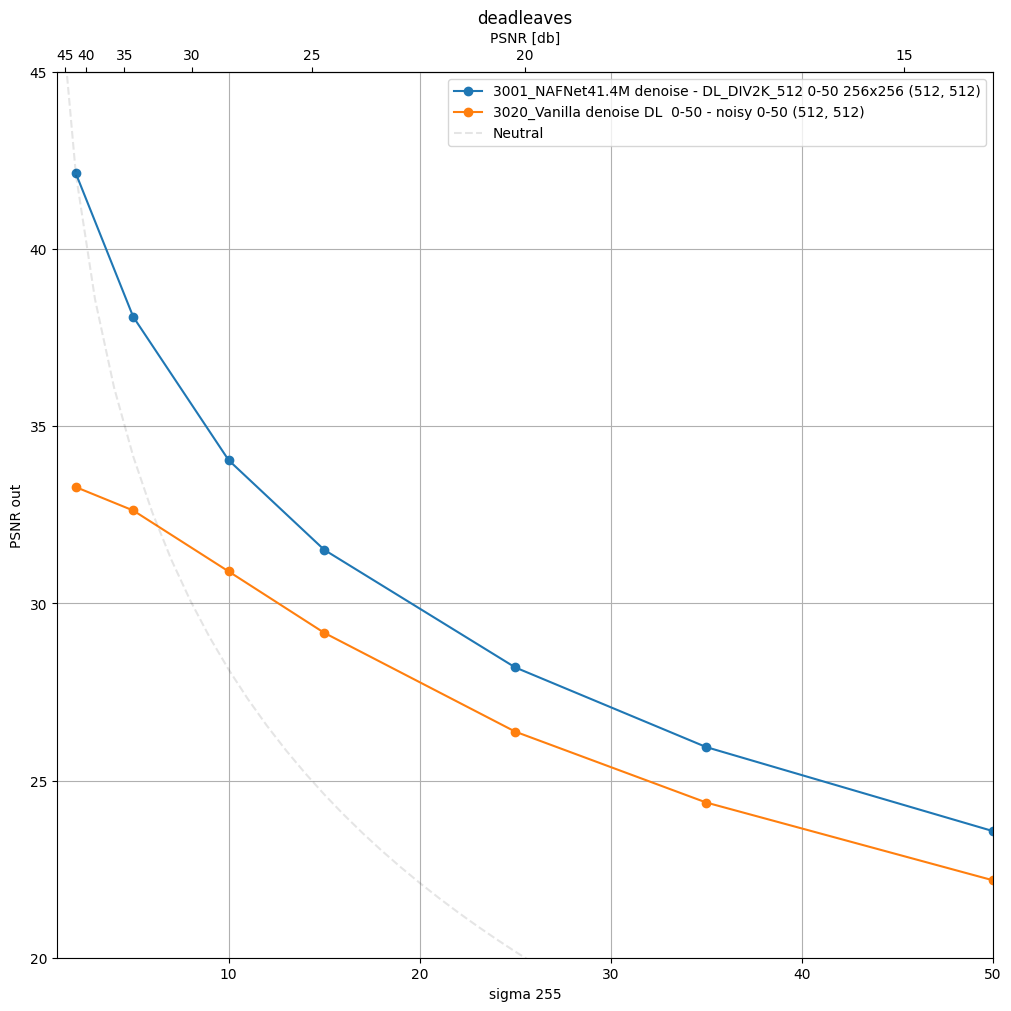

3001_NAFNet41.4M denoise - DL_DIV2K_512 0-50 256x256 (512, 512)
     in_psnr   out_psnr  noise_stddev      ssim
0  42.110066  42.134449           2.0  0.996646
1  34.150619  38.089495           5.0  0.992395
2  28.129893  34.039140          10.0  0.981963
3  24.608051  31.511859          15.0  0.968477
4  20.172521  28.192929          25.0  0.934585
5  17.248641  25.943439          35.0  0.893970
6  14.151105  23.573388          50.0  0.826246
7  10.069446  20.618426          80.0  0.681705
3020_Vanilla denoise DL  0-50 - noisy 0-50 (512, 512)
     in_psnr   out_psnr  noise_stddev      ssim
0  42.110298  33.281853           2.0  0.977728
1  34.151691  32.622895           5.0  0.973193
2  28.131055  30.901007          10.0  0.957268
3  24.608776  29.169407          15.0  0.937108
4  20.173010  26.380806          25.0  0.887376
5  17.249763  24.379461          35.0  0.831046
6  14.150738  22.184769          50.0  0.742200
7  10.068494  18.817493          80.0  0.570447


In [37]:
%load_ext autoreload
%autoreload 2
# 3001 = NafNet41M DL
# 3020 = Vanilla DL
experiment_list_compare = [
    3001, 3020,
]
for dataset in [DATASET_DL_DIV2K_512]:
    inference_path = ROOT_DIR/"__quantitative_study_denoise_full_comparisons"/dataset
    dir_inp =[(list(inference_path.glob(f"{exp:04d}_*"))[0], "*.csv") for exp in experiment_list_compare]
    stats = plot_results(dir_inp, title=dataset.replace("_512", "").replace("_div2k", "").replace("_", " "), diff=False, ylim=(20 , 45))
for k, val in stats.items():
    print(k)
    print(val)

In [57]:
for sigma in [25, 50]:
    for k, val in stats.items():
    # print(k)
    # print()
        extracted_table = val[val["noise_stddev"] == sigma]
        print(
            f'{k} | {sigma} | {extracted_table["out_psnr"].iloc[0]:0.2f}dB | {extracted_table["ssim"].iloc[0]:0.3f}')
        # print(val[val["noise_stddev"] == 50])
        # print(val[val.noise_std == 50])

3001_NAFNet41.4M denoise - DL_DIV2K_512 0-50 256x256 (512, 512) | 25 | 28.19dB | 0.935
3020_Vanilla denoise DL  0-50 - noisy 0-50 (512, 512) | 25 | 26.38dB | 0.887
3001_NAFNet41.4M denoise - DL_DIV2K_512 0-50 256x256 (512, 512) | 50 | 23.57dB | 0.826
3020_Vanilla denoise DL  0-50 - noisy 0-50 (512, 512) | 50 | 22.18dB | 0.742


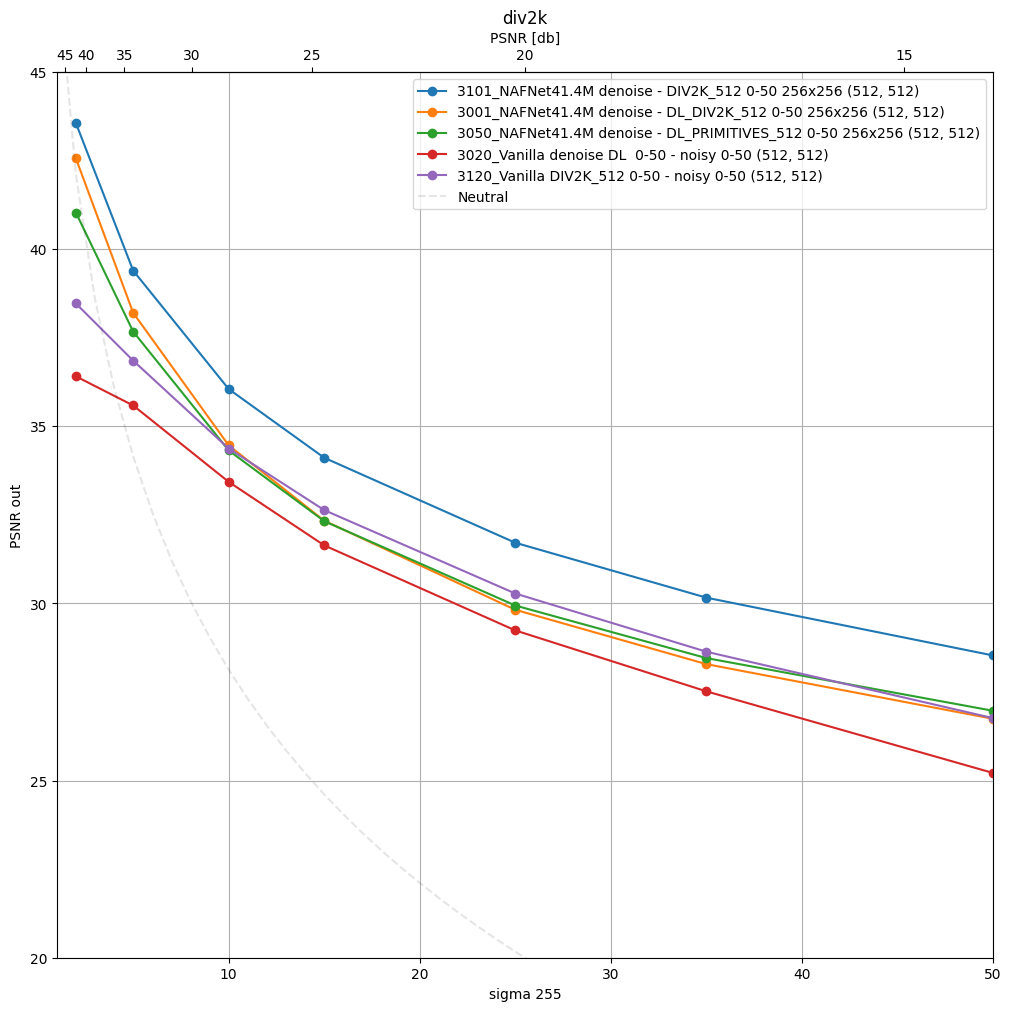

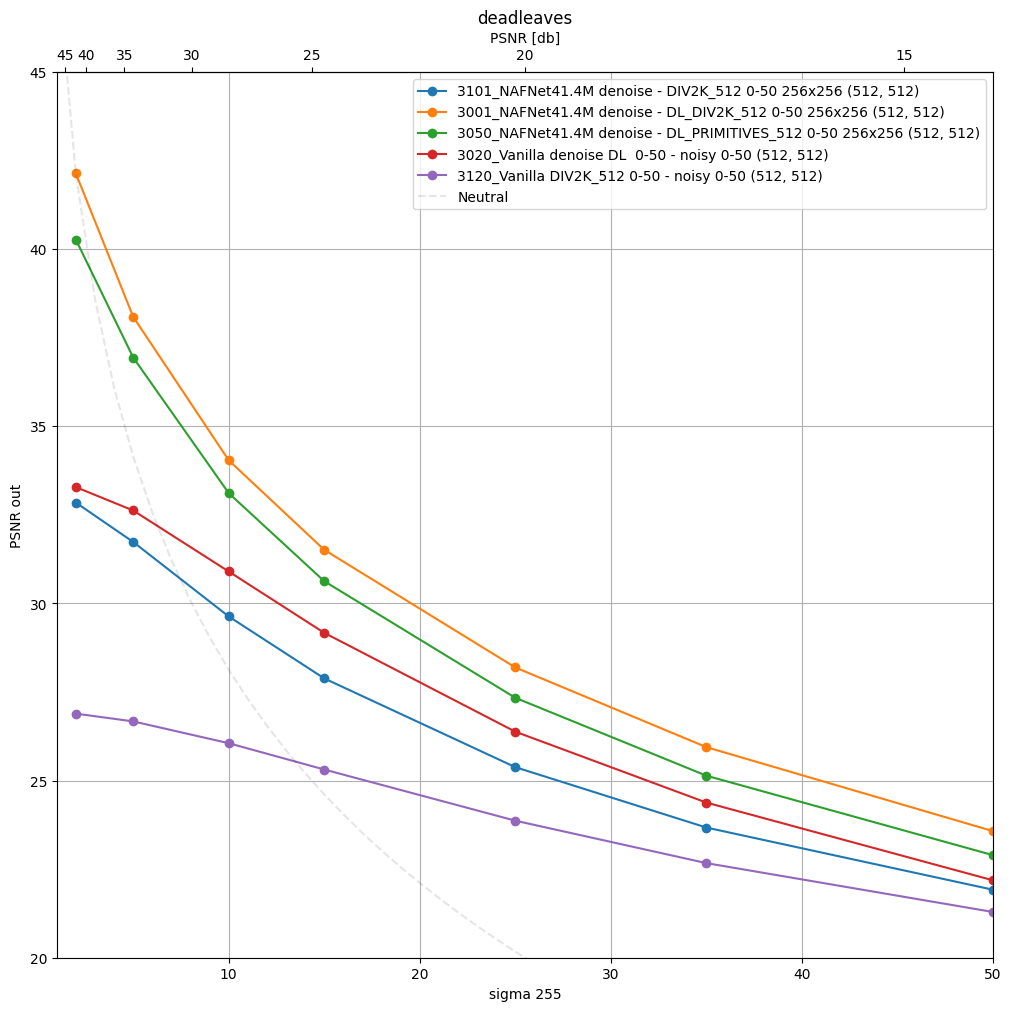

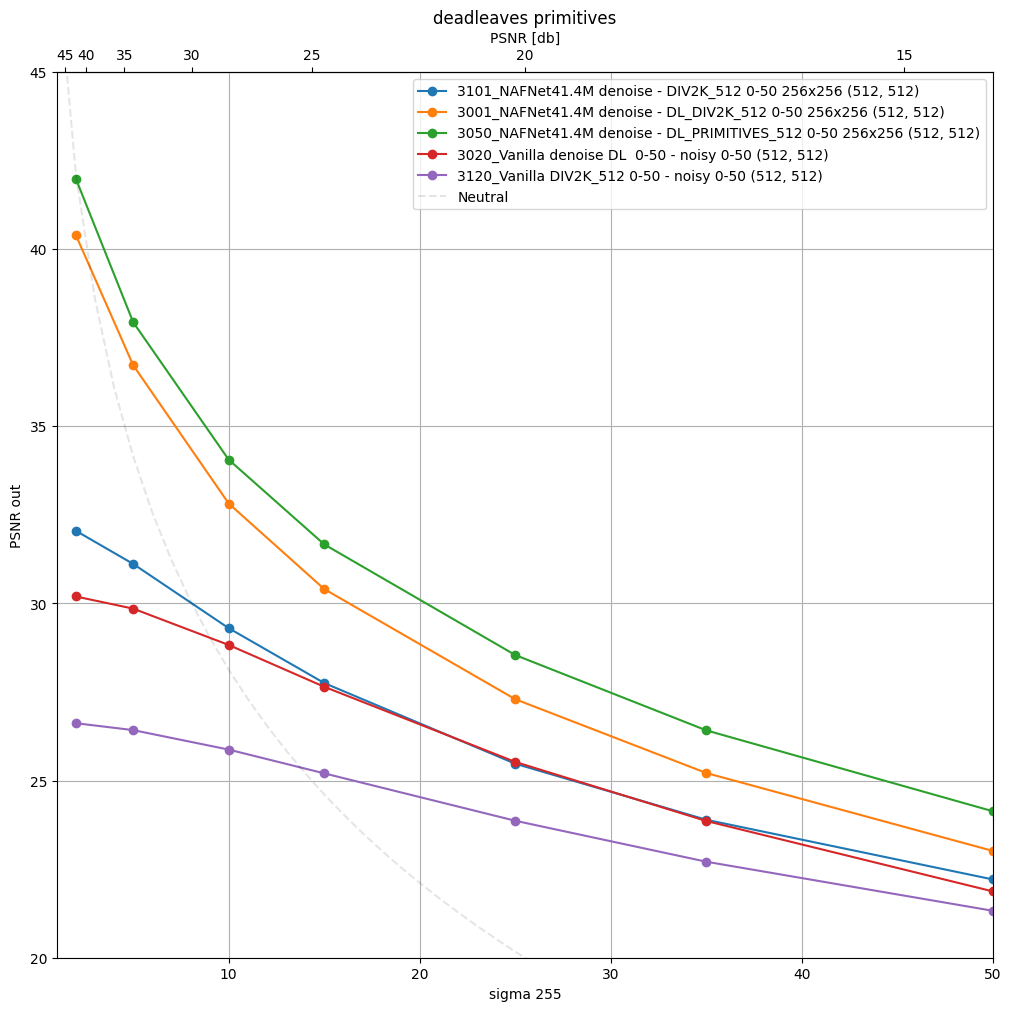

In [9]:
# 3001 = NafNet41M DL
# 3101 = NafNet41M Div2k
# 3050 = NafNet41M DL_Prim
# 3020 = Vanilla DL
# 3120 = Vanilla Div2k
experiment_list_compare = [
    3101, 3020, 3001, 3050, 3120
]
for dataset in [DATASET_DIV2K, DATASET_DL_DIV2K_512, DATASET_DL_EXTRAPRIMITIVES_DIV2K_512]:
    inference_path = ROOT_DIR/"__quantitative_study_denoise_full_comparisons"/dataset
    dir_inp =[(list(inference_path.glob(f"{exp:04d}_*"))[0], "*.csv") for exp in experiment_list_compare]
    plot_results(dir_inp, title=dataset.replace("_512", "").replace("_div2k", "").replace("_", " "), diff=False, ylim=(20 , 45))
    
